In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Simulate data for 100,000 patients
np.random.seed(42)
n_patients = 100000
precio = np.random.choice(['Alto', 'Medio' 'Bajo'], size=n_patients, p=[0.10, 0.90])
genero =np.random.choice(['Accion', 'Aventura', 'Estrategia', 'Otros'], size=n_patients, p=[0.30, 0.30, 0.30, 0.10])
criticas = np.random.choice(['Baja', 'Alta'], size=n_patients, p=[0.10, 0.90])
plataforma = np.random.choice(['Consola', 'PC'], size=n_patients, p=[0.30, 0.70])
amigos = np.random.choice(['Si', 'No'], size=n_patients, p=[0.30, 0.70])
compra = np.zeros(n_patients)

In [11]:
# Assign probabilities based on contamination and smoker status
for i in range(n_patients):
    if precio[i] == 'Alto':
        compra[i] = np.random.choice([1, 0], p=[0.30, 0.70])
    elif genero[i] == 'Accion' and amigos[i] == 'Si':
        compra[i] = np.random.choice([1, 0], p=[0.02, 0.98])
    elif criticas[i] == 'Alta':
        compra[i] = np.random.choice([1, 0], p=[0.02, 0.98])
    elif genero[i] == 'Accion' and amigos[i] == 'No':
        compra[i] = np.random.choice([1, 0], p=[0.20, 0.80])
    elif plataforma[i] == 'PC':
        compra[i] = np.random.choice([1, 0], p=[0.30, 0.70])
    else:
        compra[i] = np.random.choice([1, 0], p=[0.001, 0.999])

In [12]:
# Create a DataFrame
data = pd.DataFrame({
    'Precio': precio,
    'Genero': genero,
    'Criticas': criticas,
    'Plataforma': plataforma,
    'Amigos': amigos,
    'Compra': compra
})

In [13]:
# Calculate conditional probabilities
prob_compra = data.groupby(['Precio', 'Amigos'])['Compra'].mean().reset_index()

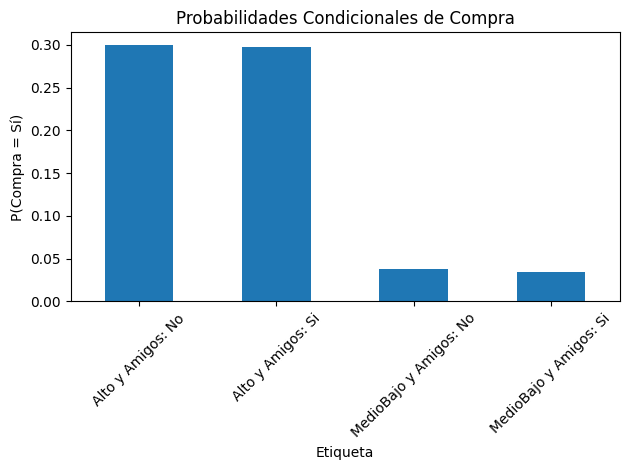

: 

In [ ]:
# Combine 'Contaminación' and 'Fumador' into a single label for the x-axis
prob_compra['Etiqueta'] = prob_compra['Precio'] + ' y Amigos: ' + prob_compra['Amigos']

# Plot the probabilities
fig, ax = plt.subplots()

prob_compra.plot(
    kind='bar',
    x='Etiqueta',
    y='Compra',
    ax=ax,
    legend=False
)

ax.set_ylabel('P(Compra = Sí)')
ax.set_title('Probabilidades Condicionales de Compra')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('probabilidades_condicionales_compra.png')
plt.show()
